In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [85]:
df1=pd.read_csv("outlier_detection.csv")
df=df1.copy()

In [86]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",None)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   brand               798 non-null    object 
 1   price               798 non-null    int64  
 2   thickness           613 non-null    object 
 3   weight              731 non-null    object 
 4   screen_size         798 non-null    int64  
 5   ppi                 798 non-null    int64  
 6   threads             777 non-null    float64
 7   ram                 798 non-null    float64
 8   antiglare           798 non-null    int64  
 9   touch_screen        798 non-null    int64  
 10  cores               794 non-null    float64
 11  battery_capacity    595 non-null    float64
 12  battery_cell        639 non-null    float64
 13  hdmi                798 non-null    int64  
 14  ethernet            798 non-null    int64  
 15  multi_card_reader   798 non-null    int64  
 16  thunderb

In [88]:
df.isnull().sum()

brand                   0
price                   0
thickness             185
weight                 67
screen_size             0
ppi                     0
threads                21
ram                     0
antiglare               0
touch_screen            0
cores                   4
battery_capacity      203
battery_cell          159
hdmi                    0
ethernet                0
multi_card_reader       0
thunderbolt             0
display_port            0
vga                     0
backlit                 0
fingerprint_sensor      0
usb2                    0
usb3                    0
typec                   0
processor_gen          43
processor_brand         0
processor_model         0
graphics_brand          0
graphics_capacity     478
graphics_model          0
everyday_use            0
business                0
performance             0
gaming                  0
hdd                   779
ssd                     0
popularity              0
quality_type            0
ppi_type    

# 1.HDD

In [89]:
#out of 798 values 779 values are null.
779/798#approx 98%values are null

0.9761904761904762

In [90]:
#the best way to deal with this column is to merge it with ssd column but we cannot merge them like that, we have convert it to the price of ssd
df["hdd"].value_counts()#there are 15 values where space is 1024 gb 

hdd
1024.0    15
64.0       2
128.0      1
32.0       1
Name: count, dtype: int64

In [91]:
#price of 1024gb hdd is equal to 512gb ssd
df["hdd"]=df["hdd"].replace(1024,512)

In [92]:
#here i replace o in ssd with the corresponding values in hdd 
df.loc[df['ssd'] == 0, 'ssd'] = df.loc[df['ssd'] == 0, 'hdd']

# 2.Thickness and Weight

In [93]:
df[df["thickness"].isnull()]

,brand,price,thickness,weight,screen_size,ppi,threads,ram,antiglare,touch_screen,cores,battery_capacity,battery_cell,hdmi,ethernet,multi_card_reader,thunderbolt,display_port,vga,backlit,fingerprint_sensor,usb2,usb3,typec,processor_gen,processor_brand,processor_model,graphics_brand,graphics_capacity,graphics_model,everyday_use,business,performance,gaming,hdd,ssd,popularity,quality_type,ppi_type,thickness_num,weight_num
1,Wings,34990,NaN,medium,15,141,8.0,8.0,1,0,4.0,17.85,NaN,1,0,0,0,0,0,1,0,1.0,2.0,1.0,11.0,intel,i5,intel,NaN,Integrated,0,1,0,0,NaN,512.0,regular,high,medium,NaN,1.600
17,Acer,59990,NaN,heavy,15,141,12.0,16.0,1,0,8.0,50.00,3.0,1,1,0,1,0,0,1,1,0.0,3.0,1.0,12.0,intel,i5,nvidia,4.0,Integrated,0,0,1,0,NaN,512.0,popular,low,medium,NaN,2.100
18,Asus,58990,NaN,medium,15,141,16.0,16.0,1,0,12.0,70.00,3.0,1,0,0,1,0,0,1,1,1.0,1.0,2.0,12.0,intel,i5,intel,NaN,Integrated,0,0,1,0,NaN,512.0,regular,medium,medium,NaN,1.800
26,Lenovo,59990,NaN,medium,15,141,12.0,16.0,1,0,10.0,NaN,3.0,1,1,1,0,0,0,1,0,0.0,2.0,2.0,12.0,intel,i7,intel,NaN,Integrated,0,0,1,0,NaN,512.0,regular,low,medium,NaN,1.700
28,HP,38490,NaN,lite,14,157,8.0,8.0,1,0,8.0,41.00,3.0,1,0,0,0,0,0,0,0,0.0,2.0,1.0,13.0,intel,i3,intel,NaN,Integrated,0,0,1,0,NaN,512.0,regular,low,high,NaN,1.400
31,Lenovo,148990,NaN,NaN,16,236,20.0,32.0,1,0,14.0,99.00,3.0,1,1,0,1,0,0,1,0,0.0,3.0,2.0,13.0,intel,i9,nvidia,8.0,rtx4060,0,0,0,1,NaN,1024.0,regular,low,high,NaN,NaN
42,Lenovo,56990,NaN,lite,14,141,12.0,16.0,1,0,8.0,56.60,NaN,1,0,0,0,0,0,1,0,0.0,2.0,2.0,12.0,intel,i5,intel,NaN,Integrated,1,0,0,0,NaN,512.0,regular,high,medium,NaN,1.460
45,Asus,55990,NaN,medium,15,141,16.0,8.0,1,0,12.0,42.00,3.0,1,0,0,0,0,0,1,1,1.0,2.0,1.0,12.0,intel,i5,intel,NaN,Integrated,0,0,1,0,NaN,512.0,regular,low,medium,NaN,1.700
52,Lenovo,18990,NaN,medium,14,157,2.0,8.0,1,0,2.0,NaN,NaN,1,0,1,0,0,0,0,0,1.0,1.0,1.0,NaN,amd,3,amd,NaN,Integrated,1,0,0,0,NaN,256.0,regular,low,high,NaN,1.800
73,MSI,48990,NaN,medium,15,141,12.0,16.0,1,0,6.0,NaN,3.0,1,1,0,1,0,0,1,0,0.0,3.0,1.0,11.0,intel,i5,nvidia,4.0,gtx1650,0,0,1,0,NaN,512.0,regular,medium,medium,NaN,1.860


<Axes: xlabel='weight'>

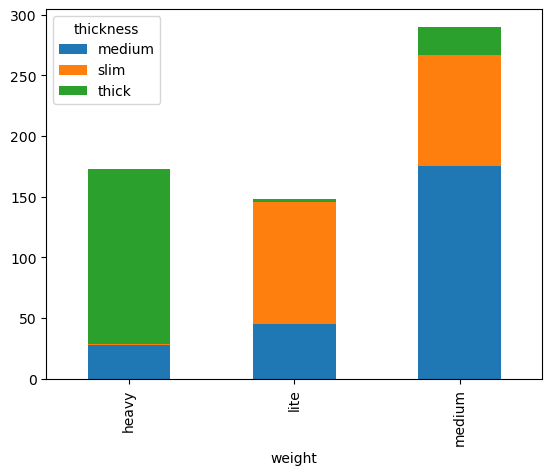

In [94]:
counts=df.groupby('weight')["thickness"].value_counts().unstack()
counts.plot(kind="bar",stacked=True)

In [95]:
#Here we see that:
#heavy->mostly thick
#lite->mostly slim
#medium ->mostly medium
#first we are going to find out the columns where both  weight and thickness columns are null
df[(df["thickness"].isnull()) & (df["weight"].isnull())].shape

(65, 41)

In [96]:
for i in df[df["thickness"].isnull()].index:
    if df.loc[i,"weight"]=="NaN":
        continue
    else:
        if df.loc[i,"weight"]=="heavy":
            df.loc[i,"thickness"]="thick"
        elif df.loc[i,"weight"]=="lite":
            df.loc[i,"thickness"]="slim"
        elif df.loc[i,"weight"]=="medium":
            df.loc[i,"thickness"]="medium"
            
        

In [97]:
df[df["weight"].isnull()].shape

(67, 41)

<Axes: xlabel='graphics_model'>

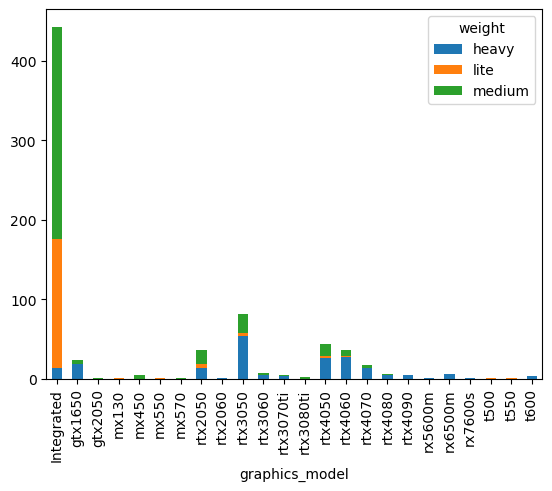

In [98]:
#now we check if the weight is depend on processor_model or graphics_model
counts=df.groupby("graphics_model")["weight"].value_counts().unstack()
counts.plot(kind="bar",stacked=True)
#by plotting with processor_model it is not clearly defined about weight distribution
#by plotting graphics_model we see that whoever have graphic card present is medium to heavy side

In [99]:
#here we see that out of 67 models 47 have integrated graphic card so we are going to replace the leftover's with "heavy"
df[(df["weight"].isnull()) & (df["graphics_model"]=="Integrated")].shape

(47, 41)

In [100]:
df.loc[(df["weight"].isnull()) & ~(df["graphics_model"]=="Integrated"),"weight"]="heavy"

In [101]:
df.loc[(df["thickness"].notna()) & (df["weight"].isnull()),"weight"]="lite"

In [104]:
df.loc[(df["thickness"].isnull()) & (df["weight"].notna()),"thickness"]="thick"

In [109]:
df[(df["thickness"].isnull()) & (df["weight"].isnull())]

,brand,price,thickness,weight,screen_size,ppi,threads,ram,antiglare,touch_screen,cores,battery_capacity,battery_cell,hdmi,ethernet,multi_card_reader,thunderbolt,display_port,vga,backlit,fingerprint_sensor,usb2,usb3,typec,processor_gen,processor_brand,processor_model,graphics_brand,graphics_capacity,graphics_model,everyday_use,business,performance,gaming,hdd,ssd,popularity,quality_type,ppi_type,thickness_num,weight_num
76,Walker,13990,NaN,NaN,14,156,2.0,4.0,1,0,2.0,18.5,2.0,1,0,0,0,0,0,0,0,1.0,1.0,0.0,NaN,intel,7,intel,NaN,Integrated,0,0,1,0,NaN,256.0,regular,low,high,NaN,NaN
101,Asus,70500,NaN,NaN,14,162,16.0,16.0,0,1,8.0,70.0,3.0,1,0,0,0,0,0,1,0,1.0,1.0,1.0,5.0,amd,5,amd,NaN,Integrated,1,0,0,0,NaN,1024.0,regular,low,high,NaN,NaN
102,Asus,65500,NaN,NaN,14,162,12.0,16.0,0,1,6.0,70.0,3.0,1,0,0,0,0,0,1,0,1.0,1.0,1.0,5.0,amd,5,amd,NaN,Integrated,1,0,0,0,NaN,1024.0,regular,low,high,NaN,NaN
104,Lenovo,90000,NaN,NaN,14,157,16.0,16.0,1,0,8.0,50.0,3.0,1,1,0,0,0,0,0,0,0.0,2.0,2.0,4.0,amd,5,amd,NaN,Integrated,0,1,0,0,NaN,512.0,regular,medium,high,NaN,NaN
125,Samsung,69990,NaN,NaN,14,157,16.0,8.0,1,0,12.0,NaN,4.0,1,0,1,0,0,0,1,1,0.0,2.0,2.0,13.0,intel,i5,intel,NaN,Integrated,0,1,0,0,NaN,512.0,regular,high,high,NaN,NaN
128,Honor,34990,NaN,NaN,14,141,12.0,8.0,0,0,6.0,NaN,3.0,1,0,0,0,0,0,1,1,1.0,1.0,1.0,5.0,amd,5,amd,NaN,Integrated,0,0,1,0,NaN,512.0,popular,low,medium,NaN,NaN
166,AXL,12989,NaN,NaN,14,156,2.0,4.0,1,0,2.0,18.5,2.0,1,0,0,0,0,0,0,0,1.0,1.0,0.0,NaN,intel,7,intel,NaN,Integrated,0,0,1,0,NaN,256.0,popular,low,high,NaN,NaN
169,Xiaomi,43990,NaN,NaN,14,243,16.0,8.0,1,0,12.0,NaN,NaN,1,0,0,1,0,0,1,0,1.0,2.0,1.0,12.0,intel,i5,intel,NaN,Integrated,0,1,0,0,NaN,512.0,regular,high,high,NaN,NaN
221,Lenovo,24551,NaN,NaN,15,141,2.0,8.0,0,0,2.0,NaN,NaN,1,1,0,0,0,0,0,0,1.0,1.0,1.0,NaN,intel,7,intel,NaN,Integrated,1,0,0,0,NaN,256.0,popular,low,medium,NaN,NaN
233,Asus,42990,NaN,NaN,15,141,12.0,8.0,1,0,10.0,NaN,3.0,1,0,0,0,0,0,1,0,1.0,2.0,1.0,12.0,intel,i3,intel,NaN,Integrated,0,0,1,0,NaN,512.0,popular,low,medium,NaN,NaN


In [115]:
counts=df.groupby("weight")["price"].mean().reset_index()
px.histogram(counts,x="weight",y="price")

In [117]:
counts=df.groupby("thickness")["price"].mean().reset_index()
px.histogram(counts,x="thickness",y="price")

In [125]:
#we are going to put thickness and weight on the basis of price
#0-40000->slim,lite
#40000-70000->medium,medium
#70000->thick,heavy
rows=df[(df["thickness"].isnull()) & (df["weight"].isnull())]
for i in rows.index:
    if rows["price"][i]<=40000:
        df.loc[i,"thickness"]="slim"
        df.loc[i,"weight"]="lite"
    elif 70000>rows["price"][i]>40000:
        df.loc[i,"thickness"]="medium"
        df.loc[i,"weight"]="medium"
    else:
        df.loc[i,"thickness"]="thick"
        df.loc[i,"weight"]="heavy"
        


# 3.Threads

In [147]:
df[(df["threads"].notna())&(df["brand"]=="Apple")]#there is only one apple product where the thread is given so we are gonna replace every apple product with 8 thread.

,brand,price,thickness,weight,screen_size,ppi,threads,ram,antiglare,touch_screen,cores,battery_capacity,battery_cell,hdmi,ethernet,multi_card_reader,thunderbolt,display_port,vga,backlit,fingerprint_sensor,usb2,usb3,typec,processor_gen,processor_brand,processor_model,graphics_brand,graphics_capacity,graphics_model,everyday_use,business,performance,gaming,hdd,ssd,popularity,quality_type,ppi_type,thickness_num,weight_num
292,Apple,72999,slim,lite,13,227,8.0,8.0,0,0,4.0,NaN,NaN,0,0,0,1,0,0,1,0,0.0,0.0,3.0,10.0,intel,i3,intel,NaN,Integrated,0,1,0,0,NaN,256.0,regular,low,high,16.0,1.29


In [149]:
df.loc[(df["threads"].isnull())&(df["brand"]=="Apple"),"threads"]=8.0

In [150]:
counts=df.groupby("processor_model")["threads"].mean().reset_index()
px.histogram(counts,x="processor_model",y="threads")

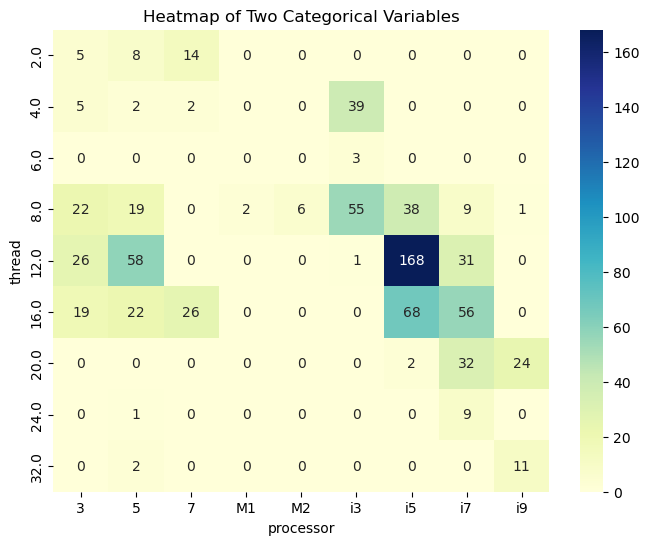

In [154]:
contingency_table=pd.crosstab(df["threads"],df["processor_model"])
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Two Categorical Variables')
plt.xlabel('processor')
plt.ylabel('thread')
plt.show()

In [158]:
#by seeing the heatmap we found out that
#if 3,5,7->12
#i3->8
#i5->12
#i7->16
#i9->20
rows=df[df["threads"].isnull()]
for row in rows.index:
    if df["processor_model"][row]=="i3":
        df.loc[row,"threads"]=8
    elif df["processor_model"][row]=="i7":
        df.loc[row,"threads"]=16
    elif df["processor_model"][row]=="i9":
        df.loc[row,"threads"]=20
    else:
        df.loc[row,"threads"]=12
    

In [160]:
df["threads"].value_counts()

threads
12.0    287
16.0    198
8.0     152
20.0     60
4.0      48
2.0      27
32.0     13
24.0     10
6.0       3
Name: count, dtype: int64

# 4.cores

In [161]:
df[df["cores"].isnull()]

,brand,price,thickness,weight,screen_size,ppi,threads,ram,antiglare,touch_screen,cores,battery_capacity,battery_cell,hdmi,ethernet,multi_card_reader,thunderbolt,display_port,vga,backlit,fingerprint_sensor,usb2,usb3,typec,processor_gen,processor_brand,processor_model,graphics_brand,graphics_capacity,graphics_model,everyday_use,business,performance,gaming,hdd,ssd,popularity,quality_type,ppi_type,thickness_num,weight_num
40,HP,22980,medium,lite,14,112,12.0,8.0,1,0,NaN,NaN,NaN,1,1,1,0,0,0,0,0,0.0,2.0,1.0,NaN,amd,3,amd,NaN,Integrated,1,0,0,0,512.0,512.0,popular,low,low,19.9,1.47
155,Lenovo,114990,thick,heavy,15,184,16.0,16.0,1,0,NaN,60.0,3.0,1,1,0,1,0,0,1,0,0.0,3.0,1.0,13.0,intel,i7,nvidia,8.0,rtx4060,0,0,0,1,NaN,512.0,regular,low,high,NaN,NaN
333,Asus,90990,thick,heavy,15,141,16.0,16.0,1,0,NaN,90.0,4.0,1,1,0,1,0,0,1,0,0.0,2.0,2.0,12.0,intel,i7,nvidia,4.0,rtx3050,0,0,0,1,NaN,1024.0,regular,high,medium,25.0,2.20
507,HP,50990,medium,medium,15,100,8.0,8.0,1,0,NaN,47.0,2.0,0,0,0,0,0,0,0,0,0.0,1.0,2.0,NaN,intel,i3,intel,NaN,Integrated,0,0,1,0,NaN,256.0,regular,high,low,18.1,1.69


In [162]:
df["cores"].value_counts()

cores
6.0     156
8.0     149
10.0    145
4.0      95
12.0     88
2.0      71
14.0     63
24.0     13
16.0     11
5.0       3
Name: count, dtype: int64

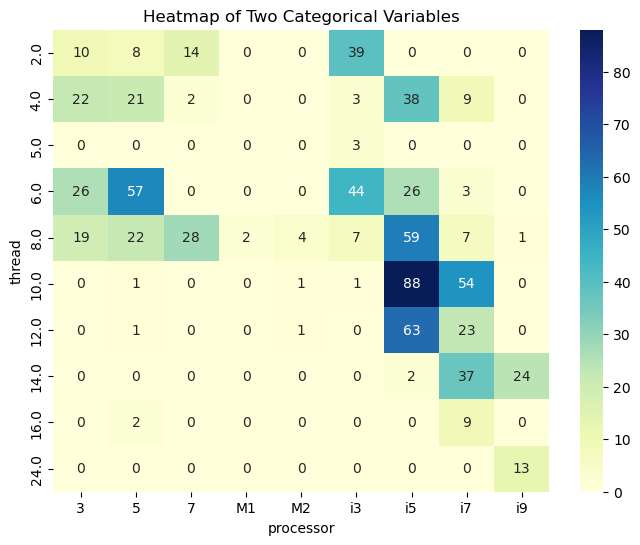

In [163]:
contingency_table=pd.crosstab(df["cores"],df["processor_model"])
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Two Categorical Variables')
plt.xlabel('processor')
plt.ylabel('thread')
plt.show()

In [171]:
counts=df.groupby("cores")["price"].mean().reset_index()
px.histogram(counts,x="cores",y="price",nbins=30)

In [174]:
rows=df[df["cores"].isnull()]
#by seeing price i decide that
df.loc[rows.index[0],"cores"]=2
df.loc[rows.index[1],"cores"]=12
df.loc[rows.index[2],"cores"]=10
df.loc[rows.index[3],"cores"]=6

# 5.Battery cell and battery capacity

In [179]:
df[(df["battery_capacity"].isnull()) & (df["battery_cell"].isnull())].shape

(51, 41)

In [228]:
counts=df.groupby("battery_cell")["battery_capacity"].mean().reset_index()
px.histogram(counts,x="battery_cell",y="battery_capacity",nbins=30)
#here we can see that as the battery cell increases battery capacity also increases

In [229]:
counts

,battery_cell,battery_capacity
0,2.0,37.261905
1,3.0,49.039806
2,4.0,71.007500
3,6.0,85.372973


In [230]:
rows=df[(df["battery_capacity"].isnull()) & (df["battery_cell"].notna())]
for row in rows.index:
    if df["battery_cell"][row]==2:
        df.loc[row,"battery_capacity"]=38
    elif df["battery_cell"][row]==3:
        df.loc[row,"battery_capacity"]=50
    elif df["battery_cell"][row]==4:
        df.loc[row,"battery_capacity"]=72
    elif df["battery_cell"][row]==6:
        df.loc[row,"battery_capacity"]=86
        

<Axes: xlabel='weight', ylabel='battery_cell'>

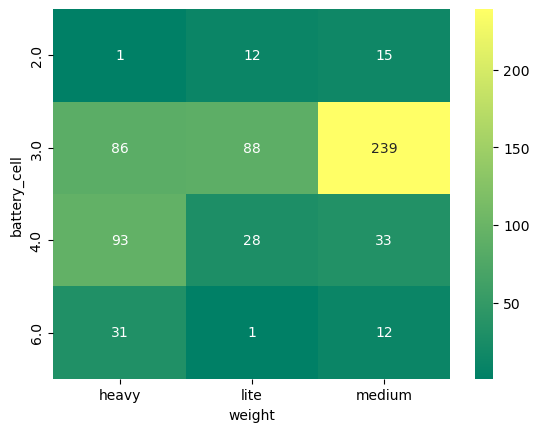

In [235]:
contingency_table=pd.crosstab(df["battery_cell"],df["weight"])
sns.heatmap(contingency_table,annot=True,fmt="d",cmap="summer")

In [241]:
counts=df.groupby("battery_cell")["price"].mean().reset_index()
px.histogram(counts,x="battery_cell",y="price",nbins=30)

<Axes: xlabel='battery_cell'>

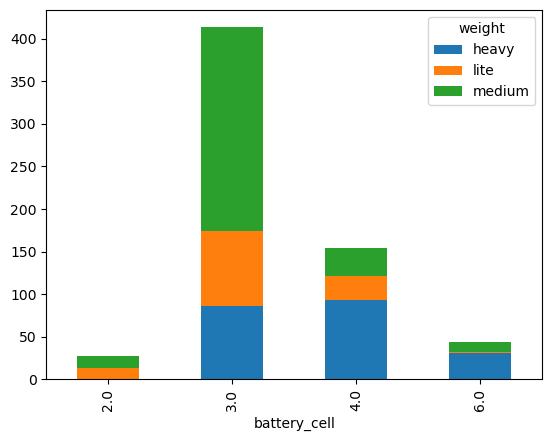

In [242]:
counts=df.groupby('battery_cell')["weight"].value_counts().unstack()
counts.plot(kind="bar",stacked=True)


In [245]:
rows=df[df["battery_cell"].isnull()]
for row in rows.index:
    if df["weight"][row]=="lite":
        df.loc[row,"battery_cell"]=2.0
    elif df["weight"][row]=="medium":
        if 50000<=df["price"][row]<=100000:
            df.loc[row,"battery_cell"]=3.0
        elif 50000>df["price"][row]:
            df.loc[row,"battery_cell"]=2.0
        else:
            df.loc[row,"battery_cell"]=4.0
    elif df["weight"][row]=="heavy":
        df.loc[row,"battery_cell"]=6.0
        
        
        

In [247]:
rows=df[(df["battery_capacity"].isnull()) & (df["battery_cell"].notna())]
for row in rows.index:
    if df["battery_cell"][row]==2:
        df.loc[row,"battery_capacity"]=38
    elif df["battery_cell"][row]==3:
        df.loc[row,"battery_capacity"]=50
    elif df["battery_cell"][row]==4:
        df.loc[row,"battery_capacity"]=72
    elif df["battery_cell"][row]==6:
        df.loc[row,"battery_capacity"]=86

# 6.Processor Gen

In [186]:
df["processor_gen"].value_counts()

processor_gen
12.0    215
13.0    212
11.0    109
7.0      97
5.0      75
6.0      14
3.0      14
10.0     11
4.0       4
8.0       3
9.0       1
Name: count, dtype: int64

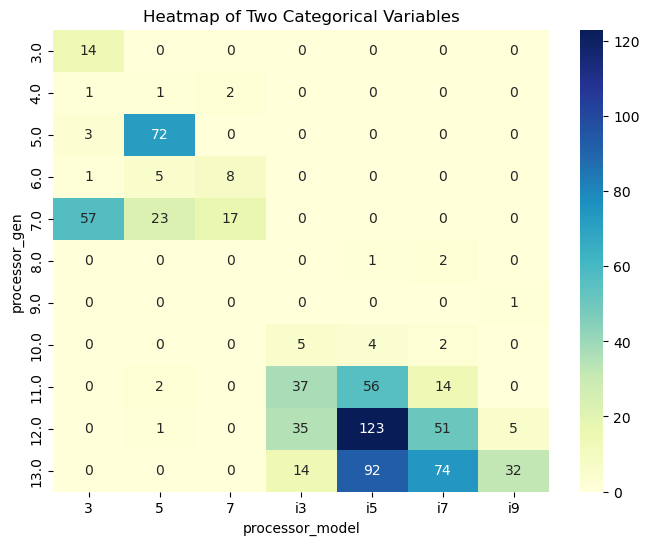

In [187]:
contingency_table=pd.crosstab(df["processor_gen"],df["processor_model"])
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Two Categorical Variables')
plt.xlabel('processor_model')
plt.ylabel('processor_gen')
plt.show()

In [190]:
counts=df.groupby("processor_gen")["price"].mean().reset_index()
px.histogram(counts,x="processor_gen",y="price",nbins=30)

In [195]:
df[df["processor_gen"].isnull()]["processor_model"].value_counts()

processor_model
7     17
5      8
i3     7
M2     6
M1     2
3      2
i7     1
Name: count, dtype: int64

In [201]:
#7->7th
#5->5th
#i3->12th
#m1,m2->1,2
#3->7
#i7->13th
rows=df[df["processor_gen"].isnull()]
for row in rows.index:
    if df["processor_model"][row]=="7" or df["processor_model"][row]=="3" :
        df.loc[row,"processor_gen"]=7
    elif df["processor_model"][row]=="5":
        df.loc[row,"processor_gen"]=5
    elif df["processor_model"][row]=="i3":
        df.loc[row,"processor_gen"]=12
    elif df["processor_model"][row]=="M1":
        df.loc[row,"processor_gen"]=1
    elif df["processor_model"][row]=="M2":
        df.loc[row,"processor_gen"]=2
    elif df["processor_model"][row]=="i7":
        df.loc[row,"processor_gen"]=13
    

# 7.graphics_capacity

In [202]:
df["graphics_capacity"].value_counts()

graphics_capacity
4.0     154
6.0      69
8.0      69
16.0      9
12.0      9
2.0       8
10.0      2
Name: count, dtype: int64

In [208]:
counts=df.groupby("graphics_capacity")["price"].mean().reset_index()
px.histogram(counts,x="graphics_capacity",y="price",nbins=30)

In [209]:
df["graphics_model"].value_counts()

graphics_model
Integrated    490
rtx3050        86
rtx4050        44
rtx4060        43
rtx2050        37
gtx1650        24
rtx4070        19
rtx4080         7
rx6500m         7
rtx4090         7
rtx3060         7
rtx3070ti       5
mx450           5
t600            4
t550            3
rtx3080ti       2
mx570           1
rx5600m         1
rx7600s         1
mx130           1
gtx2050         1
rtx2060         1
mx550           1
t500            1
Name: count, dtype: int64

In [213]:
df[(df["graphics_capacity"].isnull())&(df["graphics_model"]=="Integrated")].shape
#out of 478 column where the value of graphics_capacity is null the value of graphics_model is Integrated.

(477, 41)

In [218]:
#so we are going to put 0 where graphics_capacity is integrated
df.loc[df[(df["graphics_capacity"].isnull())&(df["graphics_model"]=="Integrated")].index,"graphics_capacity"]=0

In [221]:
df.loc[(df["graphics_capacity"].isnull())&(df["graphics_model"]!="Integrated"),"graphics_capacity"]=16

In [248]:
df.isnull().sum()

brand                   0
price                   0
thickness               0
weight                  0
screen_size             0
ppi                     0
threads                 0
ram                     0
antiglare               0
touch_screen            0
cores                   0
battery_capacity        0
battery_cell            0
hdmi                    0
ethernet                0
multi_card_reader       0
thunderbolt             0
display_port            0
vga                     0
backlit                 0
fingerprint_sensor      0
usb2                    0
usb3                    0
typec                   0
processor_gen           0
processor_brand         0
processor_model         0
graphics_brand          0
graphics_capacity       0
graphics_model          0
everyday_use            0
business                0
performance             0
gaming                  0
hdd                   779
ssd                     0
popularity              0
quality_type            0
ppi_type    

In [249]:
df.to_csv("missing_value_imputation.csv",index=False)